In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df=pd.read_excel('data_final.xlsx')
df.shape

(100, 3)

In [9]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [10]:
#check missing value
df.isnull().sum()


observation    0
feature        0
price          0
dtype: int64

In [11]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [68]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
print(x)
print(y)

    observation  feature
0          0.44     0.68
1          0.99     0.23
2          0.84     0.29
3          0.28     0.45
4          0.07     0.83
..          ...      ...
95         0.99     0.13
96         0.28     0.46
97         0.87     0.36
98         0.23     0.87
99         0.77     0.36

[100 rows x 2 columns]
0     511.14
1     717.10
2     607.91
3     270.40
4     289.88
       ...  
95    636.22
96    272.12
97    696.65
98    434.53
99    593.86
Name: price, Length: 100, dtype: float64


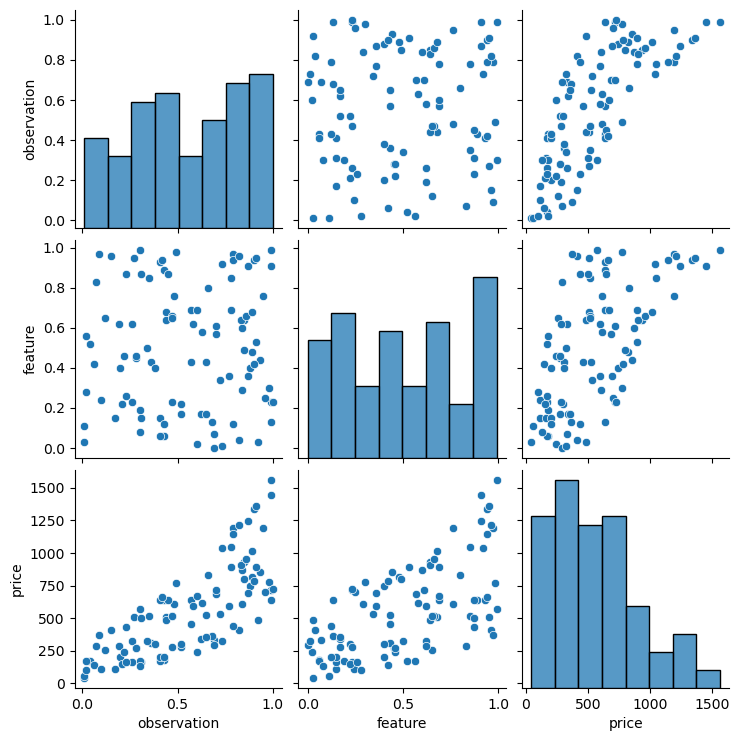

In [46]:
import seaborn as sns
sns.pairplot(df)

In [47]:
#get correlations of each features in dataset
correlation = df.corr()
top = correlation.index
plt.figure(figsize=(40,40))
plt.show()

<Figure size 4000x4000 with 0 Axes>

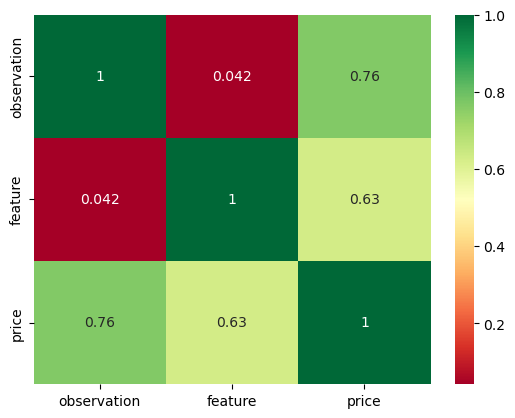

In [48]:
#ploting heat map
heat=sns.heatmap(df[top].corr(),annot=True,cmap="RdYlGn")

In [69]:
# converting from float to str
df['observation'] = df['observation'].astype(str)

In [70]:
# converting from float to int
df['feature'] = df['feature'].astype(str)

In [71]:
# converting from float to int
df['price'] = df['price'].astype(str)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   observation  100 non-null    object
 1   feature      100 non-null    object
 2   price        100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [75]:
y_pred = model.predict(x_test)

In [76]:

from sklearn.preprocessing import PolynomialFeatures
reg=PolynomialFeatures(degree=4)
poly=reg.fit_transform(x)
model1=LinearRegression()
model1.fit(poly,y)


LinearRegression()

In [82]:
#Finding errors
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(y_test,y_pred))
#MSE
print(metrics.mean_squared_error(y_test,y_pred))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

64.18857180092836
6721.341810098638
81.9837899227563
